# Importar un dataset en Google Colab desde diferentes orígenes de datos

El objetivo es aprender a importar un dataset en Google Colab, tomando dicho dataset desde diferentes orígenes: dataset local, dataset en Google Drive y dataset en Kagge. 

Para este ejercicio, utilizaremos el siguiente dataset público que encontramos en Kaggle. 

[Dataset en Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

Adicionalmente, se requiere hacer un pequeño análisis exploratorio de dicho dataset, para ver los datos que contiene, explorar sus primeras filas, conocer el nombre de las columnas, el tipo de datos que contienen las columnas, si hay valores nulos, …

## Objetivo de la actividad

Tener una primera toma de contacto con Google Colab, y aprender a importar un mismo dataset desde diferentes orígenes.

## Importar el dataset desde distintas fuentes

In [81]:
# Importación del dataset desde Kaggle
import os
import pandas as pd
from google.colab import files
!pip install -q kaggle


if not os.path.exists("/root/.kaggle/kaggle.json"):
  uploaded = files.upload()

![ -f kaggle.json ] && mv kaggle.json /root/.kaggle

!kaggle datasets download -d mirichoi0218/insurance

![ -f insurance.csv ] || unzip insurance.zip

df = pd.read_csv('insurance.csv')
df.head()

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
# Importar desde Google Drive
from google.colab import drive
drive.mount('gdrive')

# Dataset disponible en ./gdrive/MyDrive/Datasets/Kaggle/insurance.csv
df = pd.read_csv("./gdrive/MyDrive/Datasets/Kaggle/insurance.csv")
df.head()

Mounted at gdrive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
# Importar desde una URL

df = pd.read_csv("https://raw.githubusercontent.com/tuxsy/my-datasets/main/kaggle/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
# Importar desde un repositorio de Github

! [ -d my-datasets] || git clone https://github.com/tuxsy/my-datasets.git

df = pd.read_csv("my-datasets/kaggle/insurance.csv")
df.head()

/bin/bash: line 0: [: missing `]'
fatal: destination path 'my-datasets' already exists and is not an empty directory.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Análisis exploratorio del dataset

In [85]:
# Mostrar las primeras filas

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
# Ver las columnas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
# Mostrar las estadísticas básicas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [88]:
# Buscar si hay nulos

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

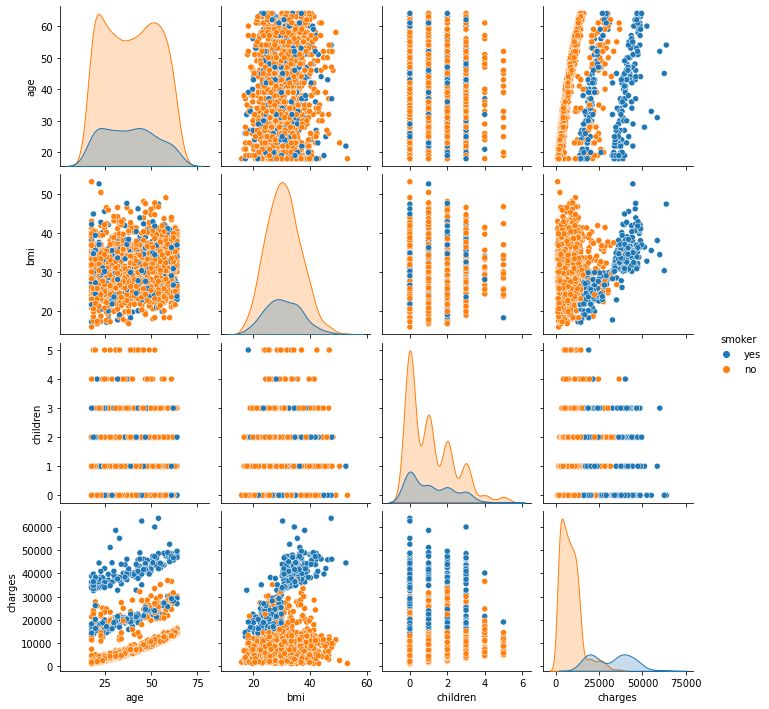

In [89]:
# Visualización gráfica de las columnas

import seaborn as sns

sns.pairplot(df, hue="smoker")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


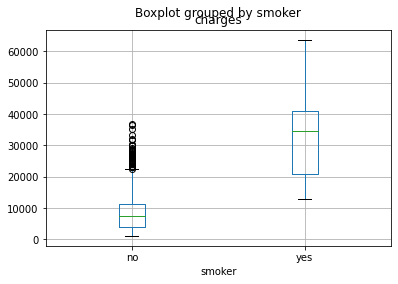

In [90]:
# Parece que es interesante la relación entre los costes médicos (charges) y si es o no fumador (smoker). Veamos cómo se distribuyen estas

df.boxplot(column=["charges"], by="smoker")

Tiene pinta de que si se es o no fumador es un factor determinante para los costes médicos. 

In [91]:
# Veamos otras correlaciones, respecto a otras variables cuantitativas

df.corr()["charges"]

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

Parece que los costes médicos también tiene que ver con la edad y (en menor medida) el índice de masa corporal.

Por lo que se ve en esta muestra, los costes médicos parecen tener poco que ver con el número de hijos. Esto tiene sentido con lo observado hasta el momento ya que las variables más determinantes (fumador, edad e IMC) tiene más que ver con los adultos (padres y madres) que con los niños.

